In [1]:
import pandas as pd

# Specifying the path Excel file
excel_file_path = r"C:\Users\safad\Desktop\new data\_advertising_data.xlsx"  # Use raw string to avoid issues with backslashes

try:
    # Loading  the Excel file into a Pandas DataFrame
    df_advertising = pd.read_excel(excel_file_path)

    # Printing the first few rows to verify the loading
    print("First few rows of the DataFrame:")
    print(df_advertising.head())

    # Printing some basic information about the DataFrame
    print("\nDataFrame Info:")
    df_advertising.info()

    # Printing the number of rows and columns
    num_rows, num_cols = df_advertising.shape
    print(f"\nNumber of Rows: {num_rows}")
    print(f"Number of Columns: {num_cols}")

except FileNotFoundError:
    print(f"Error: File not found at path: {excel_file_path}")
except Exception as e:
    print(f"An error occurred while loading the Excel file: {e}")

First few rows of the DataFrame:
   Ad_ID Ad_Topic         City  Gender  Age  Time_Spent_on_Ad  \
0      1   Travel      Chicago  Female   56             60.90   
1      2     Auto  Los Angeles  Female   32             27.70   
2      3     Food        Miami    Male   19            177.87   
3      4     Auto  Los Angeles  Female   25             88.80   
4      5     Auto  Los Angeles    Male   23            191.00   

   Daily_Internet_Usage  Clicked_on_Ad Device_Type Ad_Position Income_Level  
0                255.45              0      Mobile        Side       Medium  
1                169.39              0     Desktop         Top         High  
2                219.65              0      Tablet      Bottom         High  
3                203.72              1      Mobile         Top         High  
4                151.77              0      Mobile      Bottom          Low  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (to

In [2]:
# Identifying categorical columns (object dtype)
categorical_cols = df_advertising.select_dtypes(include='object').columns

# Printing the unique values for each categorical column
for col in categorical_cols:
    print(f"Unique values in column '{col}':")
    print(df_advertising[col].unique())
    print("-" * 50)

Unique values in column 'Ad_Topic':
['Travel' 'Auto' 'Food' 'Tech' 'Fashion']
--------------------------------------------------
Unique values in column 'City':
['Chicago' 'Los Angeles' 'Miami' 'Boston' 'New York']
--------------------------------------------------
Unique values in column 'Gender':
['Female' 'Male']
--------------------------------------------------
Unique values in column 'Device_Type':
['Mobile' 'Desktop' 'Tablet']
--------------------------------------------------
Unique values in column 'Ad_Position':
['Side' 'Top' 'Bottom']
--------------------------------------------------
Unique values in column 'Income_Level':
['Medium' 'High' 'Low']
--------------------------------------------------


In [3]:
# Performing One-Hot Encoding on categorical columns
df_encoded = pd.get_dummies(df_advertising, columns=categorical_cols, drop_first=True)

# Print the first few rows of the encoded DataFrame
print("First few rows of the encoded DataFrame:")
print(df_encoded.head())

# Print the info of the encoded DataFrame
print("\nEncoded DataFrame Info:")
df_encoded.info()

First few rows of the encoded DataFrame:
   Ad_ID  Age  Time_Spent_on_Ad  Daily_Internet_Usage  Clicked_on_Ad  \
0      1   56             60.90                255.45              0   
1      2   32             27.70                169.39              0   
2      3   19            177.87                219.65              0   
3      4   25             88.80                203.72              1   
4      5   23            191.00                151.77              0   

   Ad_Topic_Fashion  Ad_Topic_Food  Ad_Topic_Tech  Ad_Topic_Travel  \
0             False          False          False             True   
1             False          False          False            False   
2             False           True          False            False   
3             False          False          False            False   
4             False          False          False            False   

   City_Chicago  City_Los Angeles  City_Miami  City_New York  Gender_Male  \
0          True             

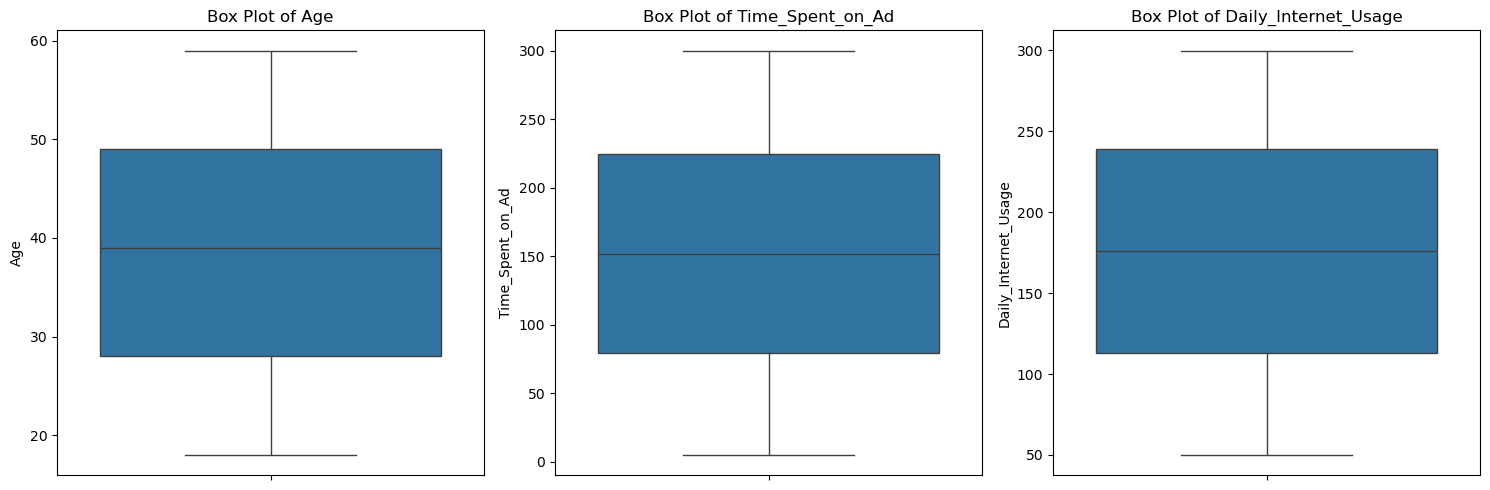


Z-Score Analysis:
Column 'Age': 0 outliers
Column 'Time_Spent_on_Ad': 0 outliers
Column 'Daily_Internet_Usage': 0 outliers


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Numerical columns to analyze
numerical_cols = ['Age', 'Time_Spent_on_Ad', 'Daily_Internet_Usage']

# --- Box Plots ---
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# --- Z-Score Analysis ---
print("\nZ-Score Analysis:")
for col in numerical_cols:
    df_encoded[f'Z_{col}'] = np.abs(stats.zscore(df_encoded[col]))
    outliers = df_encoded[df_encoded[f'Z_{col}'] > 3]  # Threshold of 3
    print(f"Column '{col}': {len(outliers)} outliers")

    #  Optionally, printing the outlier values:
    #  print(df_encoded[col][df_encoded[f'Z_{col}'] > 3])

    df_encoded.drop(columns=[f'Z_{col}'], inplace=True)  # Remove Z-score column

In [5]:
import numpy as np
from scipy import stats

# Numerical columns to analyze
numerical_cols = ['Age', 'Time_Spent_on_Ad', 'Daily_Internet_Usage']

# --- Z-Score Analysis with a threshold of 2.5 ---
print("\nZ-Score Analysis (Threshold = 2.5):")
for col in numerical_cols:
    df_encoded[f'Z_{col}'] = np.abs(stats.zscore(df_encoded[col]))
    outliers = df_encoded[df_encoded[f'Z_{col}'] > 2.5]  # Threshold of 2.5
    print(f"Column '{col}': {len(outliers)} outliers")
    df_encoded.drop(columns=[f'Z_{col}'], inplace=True)  # Remove Z-score column


Z-Score Analysis (Threshold = 2.5):
Column 'Age': 0 outliers
Column 'Time_Spent_on_Ad': 0 outliers
Column 'Daily_Internet_Usage': 0 outliers


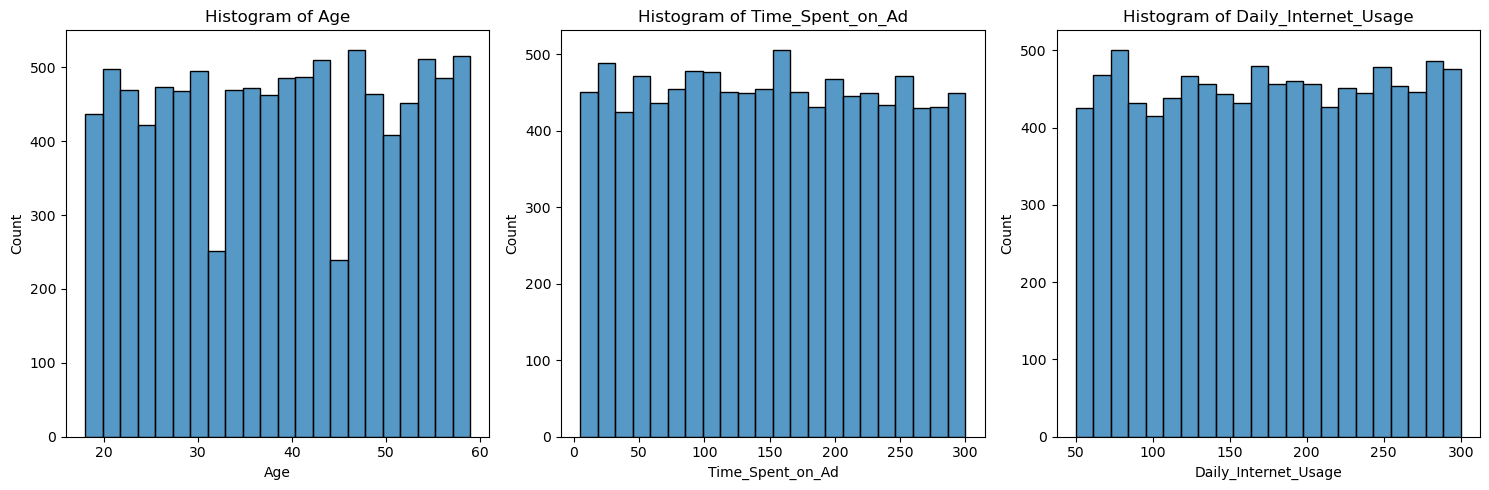

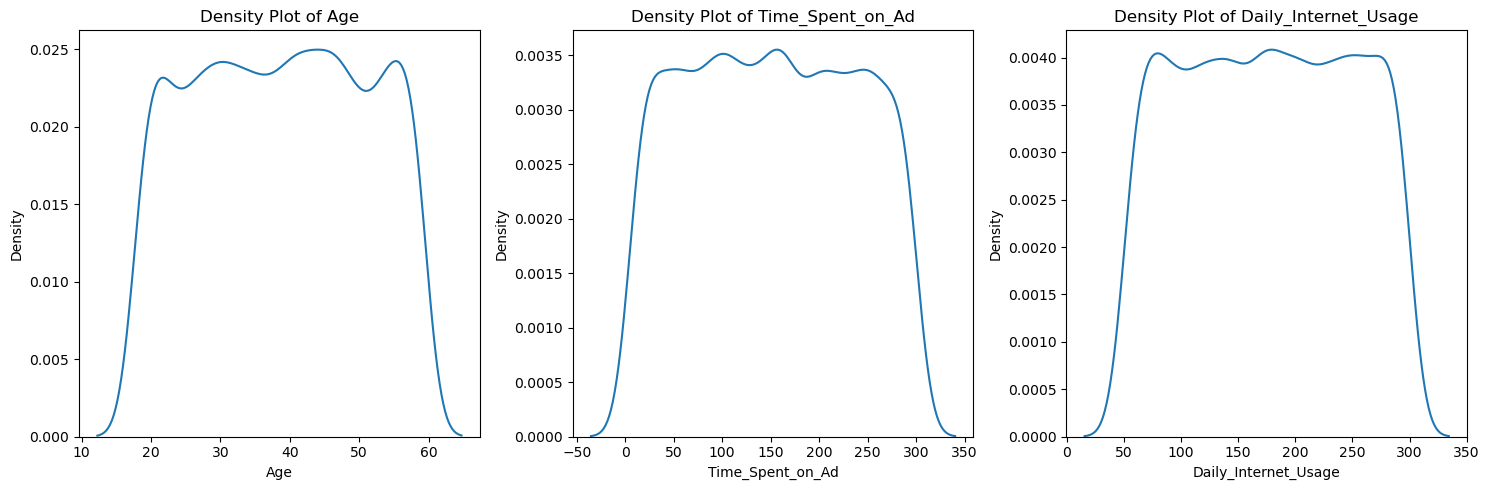

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns for EDA
numerical_cols_eda = ['Age', 'Time_Spent_on_Ad', 'Daily_Internet_Usage']

# --- Histograms ---
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_eda):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_encoded[col], kde=False)  # kde=False for histogram only
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# --- Density Plots (KDE) ---
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_eda):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(df_encoded[col])
    plt.title(f'Density Plot of {col}')
plt.tight_layout()
plt.show()

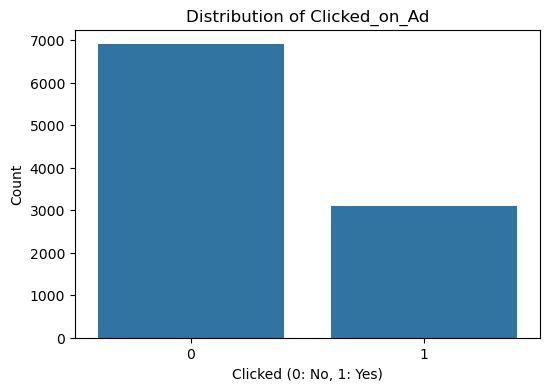

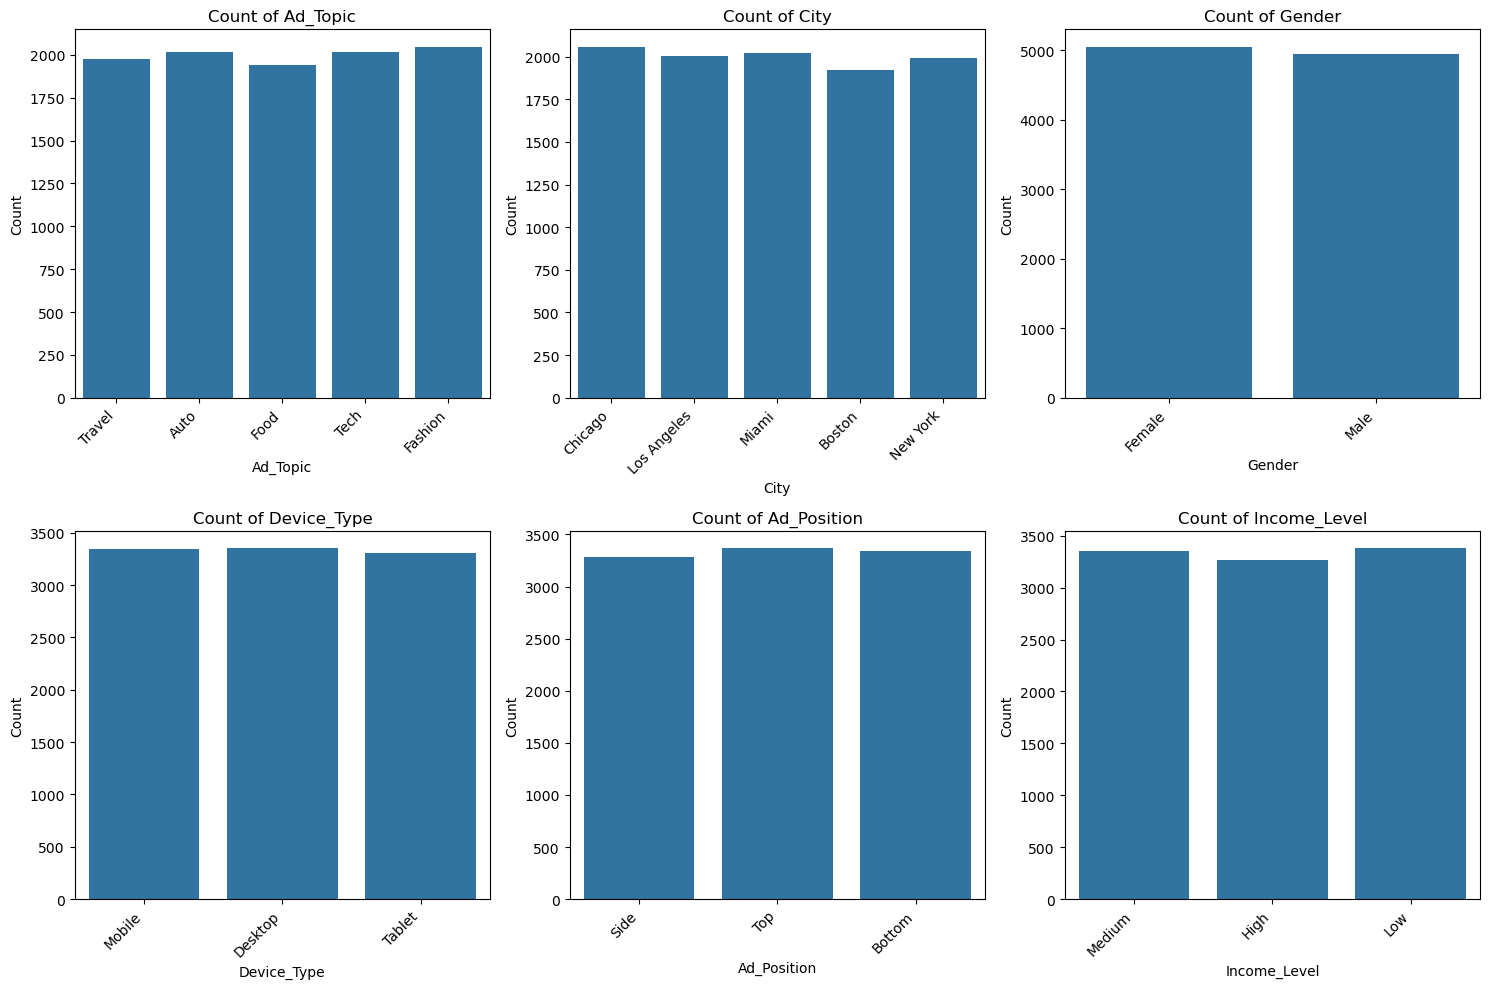

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Targeting Variable Distribution (Clicked_on_Ad) ---
plt.figure(figsize=(6, 4))
sns.countplot(x=df_encoded['Clicked_on_Ad'])
plt.title('Distribution of Clicked_on_Ad')
plt.xlabel('Clicked (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# --- Categorical Variable Counts ---
categorical_cols_eda = ['Ad_Topic', 'City', 'Gender', 'Device_Type', 'Ad_Position', 'Income_Level']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols_eda):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df_advertising[col]) 
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')  
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

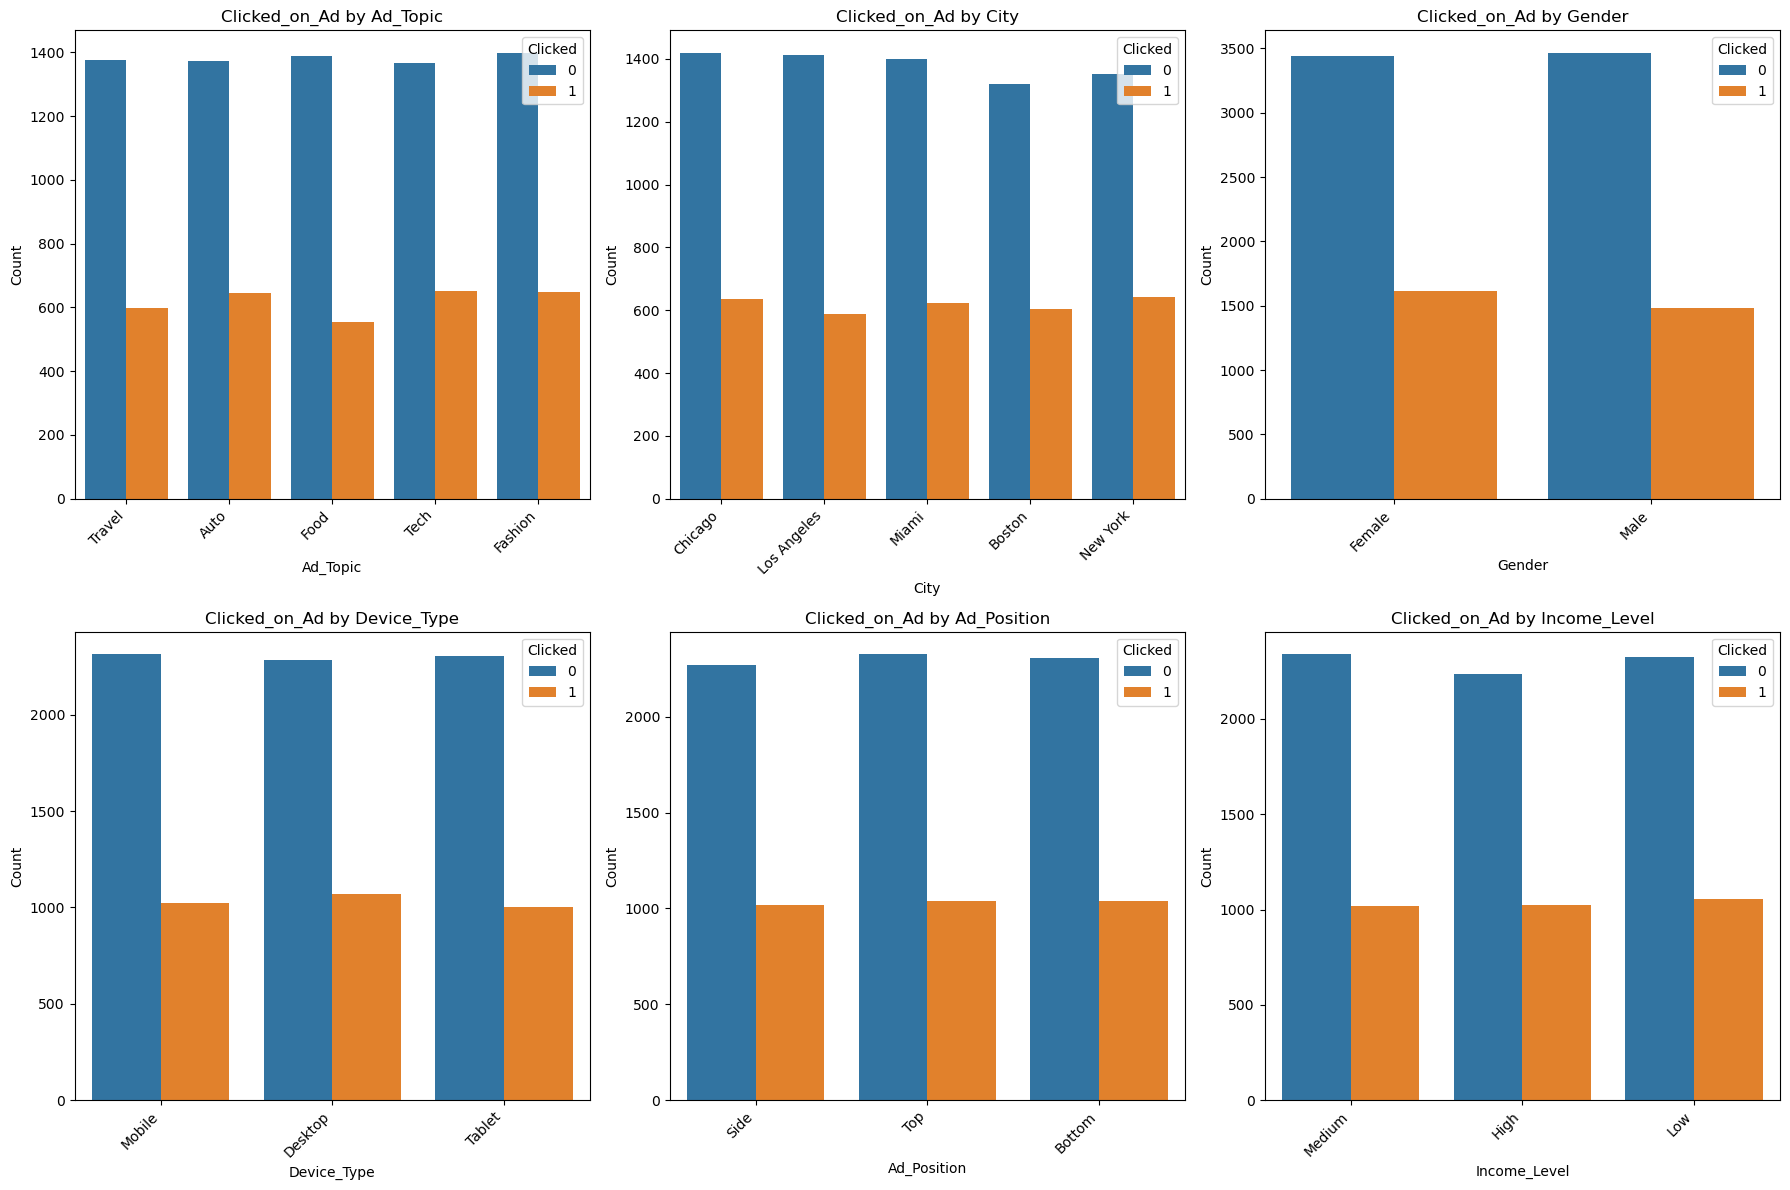

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols_eda = ['Ad_Topic', 'City', 'Gender', 'Device_Type', 'Ad_Position', 'Income_Level']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols_eda):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df_advertising[col], hue=df_encoded['Clicked_on_Ad']) 
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Clicked')
plt.tight_layout()
plt.show()

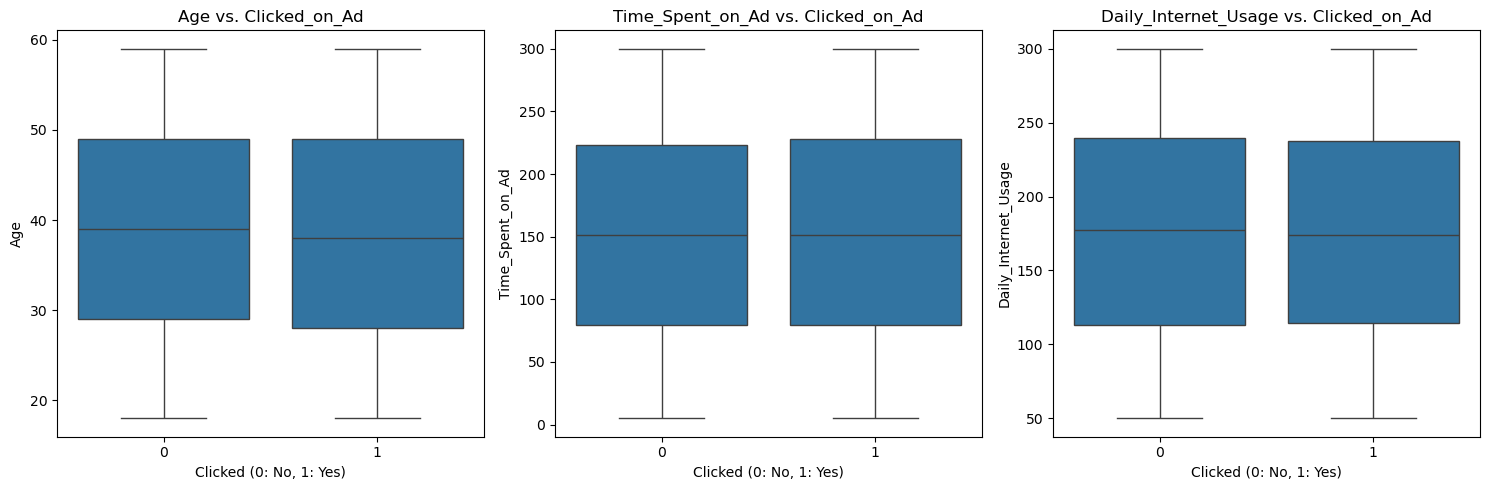

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_eda = ['Age', 'Time_Spent_on_Ad', 'Daily_Internet_Usage']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_eda):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df_encoded['Clicked_on_Ad'], y=df_encoded[col])
    plt.title(f'{col} vs. Clicked_on_Ad')
    plt.xlabel('Clicked (0: No, 1: Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Feature Matrix (X) and Target Vector (y)
X = df_encoded.drop(columns=['Clicked_on_Ad', 'Ad_ID'])  
y = df_encoded['Clicked_on_Ad']  # Target variable

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80/20 split

# 3. Initialize Models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, solver='liblinear')  # 'liblinear' solver for small datasets

# 4. Train Models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# 5. Make Predictions
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# 6. Evaluate Models (Basic Evaluation - will expand in next step)
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(classification_report(y_test, rf_predictions))

print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions)}")
print(classification_report(y_test, lr_predictions))

Random Forest Classifier:
Accuracy: 0.6665
              precision    recall  f1-score   support

           0       0.69      0.95      0.80      1374
           1       0.27      0.04      0.07       626

    accuracy                           0.67      2000
   macro avg       0.48      0.50      0.43      2000
weighted avg       0.56      0.67      0.57      2000


Logistic Regression:
Accuracy: 0.687
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      1374
           1       0.00      0.00      0.00       626

    accuracy                           0.69      2000
   macro avg       0.34      0.50      0.41      2000
weighted avg       0.47      0.69      0.56      2000



C:\Users\safad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\safad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\safad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classifier (after SMOTE):
Accuracy: 0.6355
              precision    recall  f1-score   support

           0       0.68      0.88      0.77      1374
           1       0.28      0.11      0.15       626

    accuracy                           0.64      2000
   macro avg       0.48      0.49      0.46      2000
weighted avg       0.56      0.64      0.58      2000

AUC-ROC: 0.4912163827541145

Logistic Regression (after SMOTE):
Accuracy: 0.576
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1374
           1       0.30      0.27      0.28       626

    accuracy                           0.58      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.56      0.58      0.57      2000

AUC-ROC: 0.49139426408285314


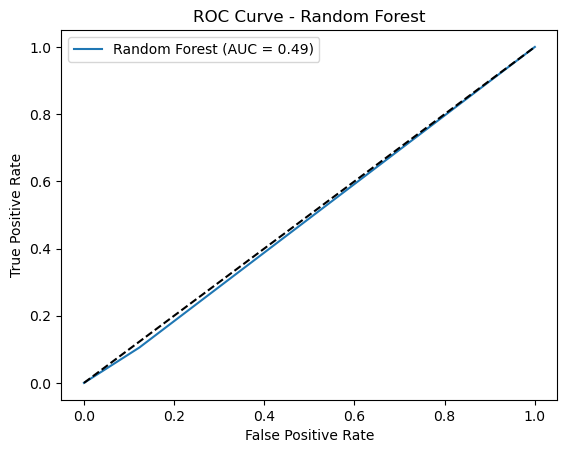

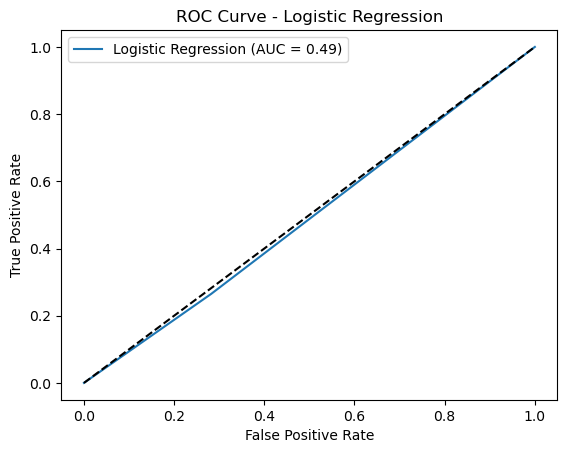

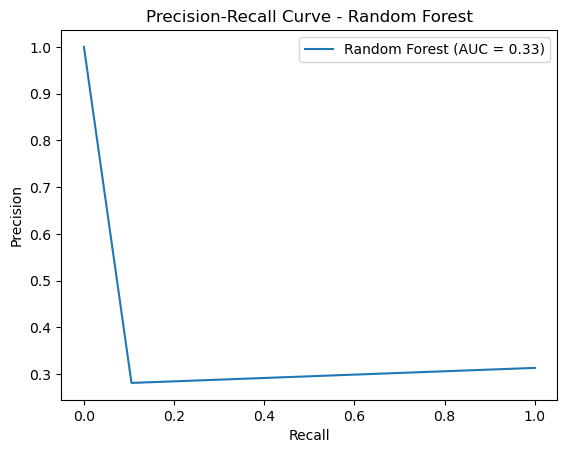

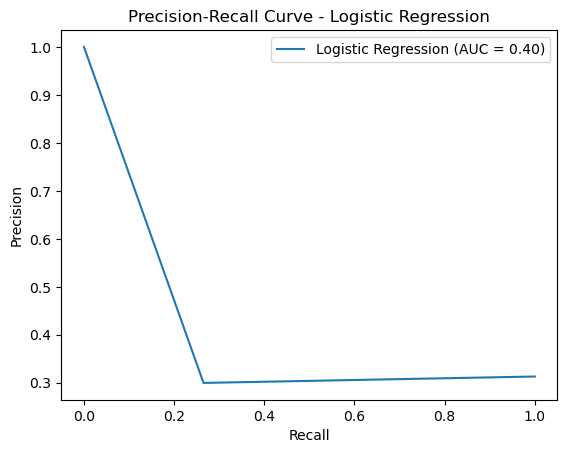

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1. Feature Matrix (X) and Target Vector (y)
X = df_encoded.drop(columns=['Clicked_on_Ad', 'Ad_ID'])  # Features, exclude target and ID
y = df_encoded['Clicked_on_Ad']  # Target variable

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80/20 split

# 3. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Initialize Models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)  # Increased max_iter

# 5. Train Models on SMOTE data
rf_model.fit(X_train_smote, y_train_smote)
lr_model.fit(X_train_smote, y_train_smote)

# 6. Make Predictions
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# 7. Evaluate Models
print("Random Forest Classifier (after SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(classification_report(y_test, rf_predictions))
print(f"AUC-ROC: {roc_auc_score(y_test, rf_predictions)}")  # Added AUC-ROC

print("\nLogistic Regression (after SMOTE):")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions)}")
print(classification_report(y_test, lr_predictions))
print(f"AUC-ROC: {roc_auc_score(y_test, lr_predictions)}")  # Added AUC-ROC

# --- Additional Evaluation Metrics and Visualization 

# Function to plot ROC Curve
def plot_roc_curve(y_true, y_pred, model_name="Model"):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

# Plot ROC Curves
plot_roc_curve(y_test, rf_predictions, "Random Forest")
plot_roc_curve(y_test, lr_predictions, "Logistic Regression")

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_pred, model_name="Model"):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {auc(recall, precision):.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

# Plot Precision-Recall Curves
plot_precision_recall_curve(y_test, rf_predictions, "Random Forest")
plot_precision_recall_curve(y_test, lr_predictions, "Logistic Regression")

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, make_scorer

# 1. Feature Matrix (X) and Target Vector (y)
X = df_encoded.drop(columns=['Clicked_on_Ad', 'Ad_ID'])
y = df_encoded['Clicked_on_Ad']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Apply SMOTE (as before)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Define Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'class_weight': ['balanced', 'balanced_subsample'] 

# 5. Define Scoring Metric
f1_scorer = make_scorer(f1_score, pos_label=1) # F1-score for the positive class

# 6. Perform Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring=f1_scorer,
                           cv=3, # 3-fold cross-validation
                           n_jobs=-1, # Use all available cores
                           verbose=1)

grid_search.fit(X_train_smote, y_train_smote)

# 7. Get Best Parameters and Best Model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# 8. Evaluate Best Model on Test Set
best_rf_predictions = best_rf_model.predict(X_test)

print("\nEvaluation of Best Random Forest Model (after Grid Search):")
print(classification_report(y_test, best_rf_predictions))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters: {'class_weight': 'balanced_subsample', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Evaluation of Best Random Forest Model (after Grid Search):
              precision    recall  f1-score   support

           0       0.68      0.88      0.77      1374
           1       0.29      0.11      0.16       626

    accuracy                           0.64      2000
   macro avg       0.49      0.49      0.47      2000
weighted avg       0.56      0.64      0.58      2000



In [14]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 2.4 MB/s eta 0:01:03
   ---------------------------------------- 1.6/150.0 MB 3.7 MB/s eta 0:00:41
    --------------------------------------- 3.4/150.0 MB 5.2 MB/s eta 0:00:29
   - -------------------------------------- 4.7/150.0 MB 5.6 MB/s eta 0:00:26
   - -------------------------------------- 4.7/150.0 MB 5.6 MB/s eta 0:00:26
   -- ------------------------------------- 7.9/150.0 MB 6.2 MB/s eta 0:00:24
   -- ------------------------------------- 8.4/150.0 MB 6.3 MB/s eta 0:00:23
   -- ------------------------------------- 8.4/150.0 MB 6.3 MB/s eta 0:00:23
   --- ------------------------------------ 11.3/150.0 MB 6.1 MB/s eta 0:00:23
   --- ------------------------------------ 12.1/150.0 MB 6.0 MB/s eta 0:00:24
   --- ------------------------------------ 12.1/150.0 MB 6.0 MB/s eta 0:00:

In [26]:
# --- 3. Evaluation ---

gbm_preds = best_gbm.predict(X_test)
stacking_preds = stacking_clf.predict(X_test)
voting_preds = voting_clf.predict(X_test)

print("GBM Classification Report:\n", classification_report(y_test, gbm_preds))
print("Stacking Classification Report:\n", classification_report(y_test, stacking_preds))
print("Voting Classification Report:\n", classification_report(y_test, voting_preds))

print("GBM AUC-ROC:", roc_auc_score(y_test, best_gbm.predict_proba(X_test)[:, 1]))
print("Stacking AUC-ROC:", roc_auc_score(y_test, stacking_clf.predict_proba(X_test)[:, 1]))
print("Voting AUC-ROC:", roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1]))

GBM Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.90      0.78      1374
           1       0.33      0.10      0.16       626

    accuracy                           0.65      2000
   macro avg       0.51      0.50      0.47      2000
weighted avg       0.58      0.65      0.59      2000

Stacking Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.84      0.75      1374
           1       0.27      0.13      0.18       626

    accuracy                           0.62      2000
   macro avg       0.48      0.48      0.46      2000
weighted avg       0.55      0.62      0.57      2000

Voting Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.75      1374
           1       0.30      0.16      0.21       626

    accuracy                           0.62      2000
   macro avg       0.49      0.49   

In [27]:
import pandas as pd

# 1. Get Predictions
voting_preds = voting_clf.predict(X_test)

# 2. Createing a DataFrame for Analysis
error_analysis_df = pd.DataFrame(X_test, columns=X_test.columns)
error_analysis_df['Actual_Clicked'] = y_test.values
error_analysis_df['Predicted_Clicked'] = voting_preds

# 3. Identifying Misclassified Instances
misclassified_df = error_analysis_df[error_analysis_df['Actual_Clicked'] != error_analysis_df['Predicted_Clicked']]

# Separate False Positives and False Negatives
false_positives_df = misclassified_df[(misclassified_df['Predicted_Clicked'] == 1) & (misclassified_df['Actual_Clicked'] == 0)]
false_negatives_df = misclassified_df[(misclassified_df['Predicted_Clicked'] == 0) & (misclassified_df['Actual_Clicked'] == 1)]

# 4. Examine Misclassified Instances
print("\n--- All Misclassified Instances ---")
print(misclassified_df.head())
print(f"\nTotal Misclassified Instances: {len(misclassified_df)}")

print("\n--- False Positives (Predicted Click, Actual No Click) ---")
print(false_positives_df.head())
print(f"Number of False Positives: {len(false_positives_df)}")

print("\n--- False Negatives (Predicted No Click, Actual Click) ---")
print(false_negatives_df.head())
print(f"Number of False Negatives: {len(false_negatives_df)}")


--- All Misclassified Instances ---
      Age  Time_Spent_on_Ad  Daily_Internet_Usage  Ad_Topic_Fashion  \
6340   22             58.42                130.00             False   
576    44            139.17                228.56             False   
439    22             30.03                150.76              True   
2750   54             69.88                151.04             False   
7487   20            294.37                295.53              True   

      Ad_Topic_Food  Ad_Topic_Tech  Ad_Topic_Travel  City_Chicago  \
6340          False           True            False          True   
576           False           True            False          True   
439           False          False            False         False   
2750          False          False             True         False   
7487          False          False            False          True   

      City_Los Angeles  City_Miami  City_New York  Gender_Male  \
6340             False       False          False      